<h5>Applications of sentiment analysis</h5>
1. Analysis of product reviews<br>
2. Predicting stock price movement from news

    

In [112]:
import pandas as pd
import numpy as np
import seaborn as sn
import random
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

In [15]:
train_ds = pd.read_csv(r"C:\Term 3\Supervised learning with python\Codes-Data-Files\Machine Learning (Codes and Data Files)\Data\sentiment_train",delimiter = '\t')
train_ds

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...
...,...,...
6913,0,Brokeback Mountain was boring.
6914,0,So Brokeback Mountain was really depressing.
6915,0,"As I sit here, watching the MTV Movie Awards, ..."
6916,0,Ok brokeback mountain is such a horrible movie.


In [16]:
train_ds[train_ds.sentiment == 0][0:5]

,sentiment,text
3943,0,da vinci code was a terrible movie.
3944,0,"Then again, the Da Vinci code is super shitty ..."
3945,0,"The Da Vinci Code comes out tomorrow, which su..."
3946,0,i thought the da vinci code movie was really b...
3947,0,"God, Yahoo Games has this truly-awful looking ..."


In [17]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6918 entries, 0 to 6917
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  6918 non-null   int64 
 1   text       6918 non-null   object
dtypes: int64(1), object(1)
memory usage: 108.2+ KB


<Axes: xlabel='sentiment', ylabel='count'>

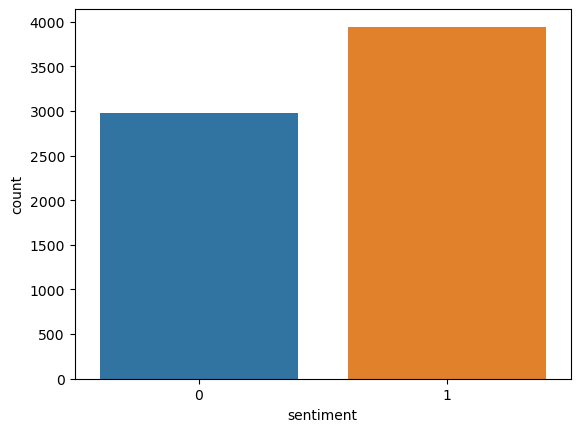

In [20]:
sn.countplot(x = "sentiment",data = train_ds)

First we need to pre process data to extract features out of the data. This can be done by applying bag of words model to data.
<br>
<h6>Bag of words model</h6><br>
1. First a corpus of words is created by extracting all unique words from the dataset.><br>
2. Then each document in the corpus is transformed to a vector.><br>
3. There are three ways of identifying importance of a word in document. <br>
    -> Count frequency model<br>
    -> Term frequency model<br>
    -> Term Frequency inverse document frequency



<h5> Count vector  model </h5>
<br>
For creating count vector of document we create count of each word in the document
<br>
<h5> Term Frequency model </h5>
<br>
Term frequency is the frequency of each word in the corpus.
<br>
Term Frequency = (number of occurences of word i in the document/Total no of words in the document)
<br>
<h5> Term frequency inverse document frequency </h5>
Tf-idf measures the importance of words in terms of number of times words appear in the document and number of time term appear in th corpus. It increases as number of words in the document increases and decreases as the number of words in document decreases


In [27]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object
count_vectorizer = CountVectorizer()

# Fit the CountVectorizer on the text data
feature_vector = count_vectorizer.fit(train_ds.text)

# Get the feature names from the CountVectorizer
features = feature_vector.get_feature_names_out()

# Print the total number of features
print("Total number of features:", len(features))


Total number of features: 2132


In [33]:
random.sample(list(features),10)

['bunch',
 'fan',
 'maybe',
 'moving',
 'kinda',
 'codes',
 'author',
 'finals',
 'lost',
 'lubb']

In [35]:
train_ds_features = count_vectorizer.transform(train_ds.text)
train_ds_features.shape
#train_ds_features is a sparse matrix with majority values being zero

(6918, 2132)

In [39]:
print(train_ds_features.getnnz())

65398


In [43]:
print(train_ds_features.shape[0]*train_ds_features.shape[1])

14749176


In [45]:
print(train_ds_features.getnnz()*100/(train_ds_features.shape[0]*train_ds_features.shape[1]))
#The matrix has less than 1% values as non zero values

0.4434010415225908


In [50]:
train_ds_df = pd.DataFrame(train_ds_features.todense())
train_ds_df.columns = features
train_ds_df[["the","da","vinci","code","book","is","just","awesome"]]

,the,da,vinci,code,book,is,just,awesome
0,1,1,1,1,1,1,1,1
1,1,1,1,1,0,0,0,0
2,1,1,1,1,0,0,0,0
3,1,1,1,1,0,0,0,0
4,1,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...
6913,0,0,0,0,0,0,0,0
6914,0,0,0,0,0,0,0,0
6915,2,0,0,0,0,0,0,0
6916,0,0,0,0,0,1,0,0


In [53]:
features_counts = np.sum(train_ds_features.toarray(),axis = 0)
features_counts

array([ 1,  1,  4, ...,  1, 80,  1], dtype=int64)

In [55]:
features_counts_df = pd.DataFrame(dict(features = features,counts = features_counts))
features_counts_df

,features,counts
0,00,1
1,007,1
2,10,4
3,10pm,1
4,12,1
...,...,...
2127,yuck,1
2128,yuh,1
2129,zach,1
2130,zen,80


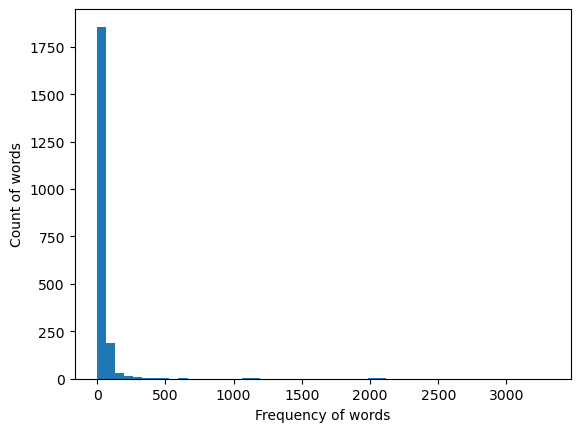

In [63]:
plt.hist(features_counts_df["counts"],bins = 50)
plt.xlabel("Frequency of words")
plt.ylabel("Count of words")
plt.show()

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object
count_vectorizer = CountVectorizer(max_features = 1000)

# Fit the CountVectorizer on the text data
feature_vector = count_vectorizer.fit(train_ds.text) #this statement will extract all the unique words from the corpus

# Get the feature names from the CountVectorizer
features = feature_vector.get_feature_names_out()

train_ds_features = count_vectorizer.transform(train_ds.text) #this statement will convert every document to its corresponding vector
feature_count = np.sum(train_ds_features.toarray(),axis = 0)
feature_counts = pd.DataFrame(dict(feature = features,count = feature_count))
feature_counts

,feature,count
0,10,4
1,17,3
2,33,2
3,6th,3
4,aaron,2
...,...,...
995,yesterday,2
996,yet,8
997,you,331
998,your,9


In [65]:
feature_counts.sort_values("count",ascending=False)[0:15]

,feature,count
866,the,3306
37,and,2154
358,harry,2093
675,potter,2093
138,code,2002
934,vinci,2001
178,da,2001
528,mountain,2000
104,brokeback,2000
488,love,1624


In [67]:
from sklearn.feature_extraction import text
my_stop_words  = text.ENGLISH_STOP_WORDS
print("Few Stop Words : ",list(my_stop_words))

Few Stop Words :  ['we', 'these', 'whether', 'much', 'sixty', 'inc', 'from', 'how', 'why', 'ltd', 'due', 'whereupon', 'through', 'though', 'hereupon', 'no', 'although', 'any', 'too', 'become', 'nowhere', 'anything', 'herself', 'wherein', 'hers', 'find', 'still', 'everything', 'had', 'anywhere', 'nevertheless', 'cannot', 'seeming', 'am', 'for', 'noone', 'another', 'across', 'well', 'here', 'very', 'show', 'were', 'thin', 'under', 'indeed', 'hereby', 'amongst', 'will', 'anyway', 'now', 'perhaps', 'take', 'cry', 'describe', 'go', 'fire', 'each', 'yourselves', 'nothing', 'whom', 'three', 'nine', 'us', 'system', 'whole', 'was', 'somehow', 'with', 'afterwards', 'however', 'since', 'once', 'bottom', 'detail', 'must', 'full', 'whereafter', 'five', 'next', 'beside', 'yourself', 'whereby', 'itself', 'your', 'therefore', 'former', 'eight', 'own', 'becomes', 'in', 'she', 'our', 'made', 'whenever', 'might', 'none', 'this', 'until', 'he', 'among', 'hundred', 'thus', 'somewhere', 'beyond', 'first', '

In [68]:
my_stop_words = text.ENGLISH_STOP_WORDS.union(['harry','potter','code','vinci','da','harry','mountain','movie','movies'])
my_stop_words

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [70]:
count_vectorizer = CountVectorizer(stop_words = list(my_stop_words),max_features = 1000)
feature_vector = count_vectorizer.fit(train_ds.text)
feature_names = feature_vector.get_feature_names_out()
train_ds_features = count_vectorizer.transform(train_ds.text)
features_counts = pd.DataFrame(dict(features = feature_names,count = np.sum(train_ds_features.toarray(),axis = 0)))
features_counts


,features,count
0,00,1
1,10,4
2,17,3
3,33,2
4,6th,3
...,...,...
995,younger,1
996,yuck,1
997,yuh,1
998,zach,1


In [74]:
features_counts.sort_values("count",ascending = False)[0:10]

,features,count
73,brokeback,2000
408,love,1624
39,awesome,1127
436,mission,1094
341,impossible,1093
390,like,974
745,sucks,602
743,sucked,600
297,hate,578
652,really,374


<h6> Stemming </h6><br>
Stemming refers to the process of converting a word to its root word. For example loved will be converted to word love.
<br>
<h6> Lemmatization </h6><br>
This takes morphological analysis of the word into consideration. It uses languague dictionary to convert the word into root word. For example man and men would be converted to man

In [76]:
from nltk.stem.snowball import PorterStemmer
stemmer = PorterStemmer()
analyzer  = CountVectorizer().build_analyzer()

In [82]:
def stemmed_words(doc):
    stemmed_words = [stemmer.stem(w) for w in analyzer(doc)]
    non_stop_words = [word for word in stemmed_words if word not in my_stop_words]
    return non_stop_words

In [83]:
count_vectorizer = CountVectorizer(analyzer = stemmed_words,max_features=1000)
feature_vector = count_vectorizer.fit(train_ds.text)
feature_names = feature_vector.get_feature_names_out()
train_ds_features = count_vectorizer.transform(train_ds.text)
features_counts = pd.DataFrame(dict(features = feature_names,count = np.sum(train_ds_features.toarray(),axis = 0)))
features_counts.sort_values("count",ascending = False)[0:10]

,features,count
303,harri,2093
83,brokeback,2000
414,love,1883
791,suck,1484
922,wa,1176
400,like,1155
447,movi,1149
45,awesom,1130
441,mission,1094
351,imposs,1093


In [88]:
train_ds_df = pd.DataFrame(train_ds_features.todense(),columns = feature_names)
train_ds_df['sentiment'] = train_ds['sentiment']


<Axes: xlabel='sentiment', ylabel='awesom'>

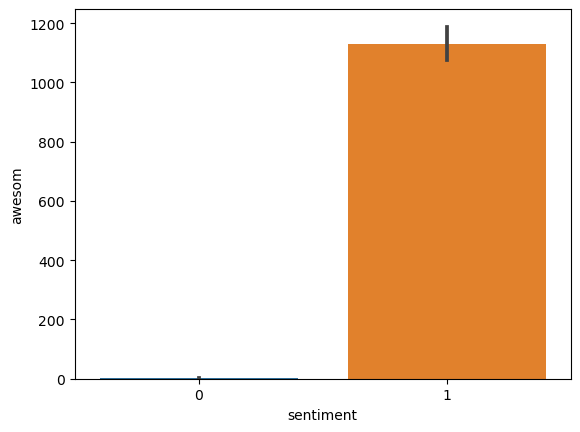

In [89]:
sn.barplot(x = 'sentiment',y = 'awesom',data = train_ds_df,estimator=sum)

<Axes: xlabel='sentiment', ylabel='realli'>

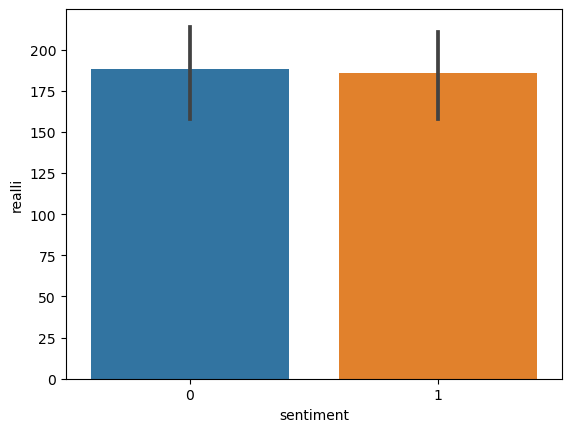

In [90]:
sn.barplot(x = 'sentiment',y = 'realli',data = train_ds_df,estimator=sum)

<Axes: xlabel='sentiment', ylabel='hate'>

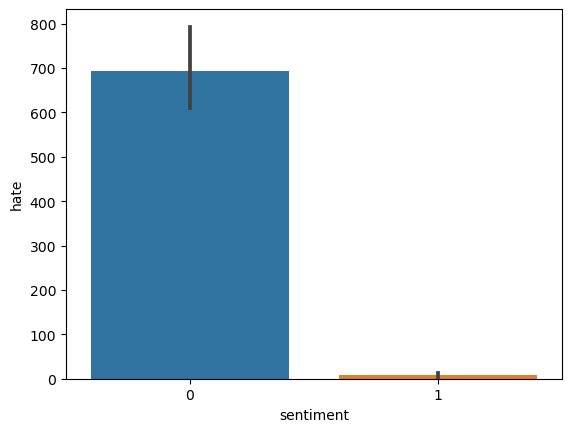

In [91]:
sn.barplot(x = 'sentiment',y = 'hate',data = train_ds_df,estimator=sum)

### word awesom and hate are good features to predict sentiment

In [93]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(train_ds_features,train_ds.sentiment,test_size=0.3,random_state=42)

In [97]:
train_X.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [98]:
from sklearn.naive_bayes import BernoulliNB
nb_clf = BernoulliNB()
nb_clf.fit(train_X.toarray(),train_Y)

BernoulliNB()

In [101]:
test_Y_predict = nb_clf.predict(test_X.toarray())

In [103]:
print(metrics.classification_report(test_Y,test_Y_predict))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       873
           1       0.98      0.99      0.98      1203

    accuracy                           0.98      2076
   macro avg       0.98      0.98      0.98      2076
weighted avg       0.98      0.98      0.98      2076



<Axes: >

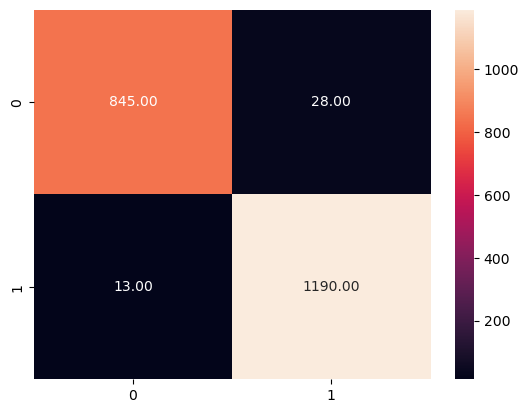

In [105]:
cm = metrics.confusion_matrix(test_Y,test_Y_predict)
sn.heatmap(cm,annot=True,fmt = '.2f')
##Row represents actual values and column represents predicted values

In [107]:
tfidf_vectorizer = TfidfVectorizer(analyzer = stemmed_words, max_features = 1000)
feature_vector = tfidf_vectorizer.fit(train_ds.text)
feature_names = feature_vector.get_feature_names_out()
train_ds_features = tfidf_vectorizer.transform(train_ds.text)
features_counts = pd.DataFrame(dict(features = feature_names,count = np.sum(train_ds_features.toarray(),axis = 0)))
features_counts.sort_values("count",ascending = False)[0:10]

,features,count
414,love,765.920395
83,brokeback,667.700015
791,suck,643.888454
45,awesom,609.369514
303,harri,596.942489
922,wa,453.781843
447,movi,391.712458
441,mission,341.318000
351,imposs,341.144676
400,like,319.941242


In [109]:
train_X,test_X,train_Y,test_Y = train_test_split(train_ds_features,train_ds.sentiment,test_size=0.3,random_state=42)

In [114]:
nb_clf = GaussianNB()
nb_clf.fit(train_X.toarray(),train_Y)
test_Y_predict = nb_clf.predict(test_X.toarray())
print(metrics.classification_report(test_Y,test_Y_predict))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       873
           1       0.97      0.97      0.97      1203

    accuracy                           0.97      2076
   macro avg       0.97      0.97      0.97      2076
weighted avg       0.97      0.97      0.97      2076

